In [2]:
fitness <- read.table("fitness.txt", header = TRUE, row.names = 1)

head(fitness)

,Gender,Runtime,Age,Weight,Oxygen_Consumption,Run_Pulse,Rest_Pulse,Maximum_Pulse,Performance
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Donna,F,8.17,42,68.15,59.57,166,40,172,14
Gracie,F,8.63,38,81.87,60.06,170,48,186,13
Luanne,F,8.65,43,85.84,54.30,156,45,168,13
Mimi,F,8.92,50,70.87,54.63,146,48,155,11
Chris,M,8.95,49,81.42,49.16,180,44,185,11
Allen,M,9.22,38,89.02,49.87,178,55,180,12


### Questão 1

In [ ]:
summary(fitness$Oxygen_Consumption)

    Gender             Runtime           Age            Weight     
 Length:31          Min.   : 8.17   Min.   :38.00   Min.   :59.08  
 Class :character   1st Qu.: 9.78   1st Qu.:44.00   1st Qu.:73.20  
 Mode  :character   Median :10.47   Median :48.00   Median :77.45  
                    Mean   :10.59   Mean   :47.68   Mean   :77.44  
                    3rd Qu.:11.27   3rd Qu.:51.50   3rd Qu.:82.33  
                    Max.   :14.03   Max.   :57.00   Max.   :91.63  
 Oxygen_Consumption   Run_Pulse       Rest_Pulse    Maximum_Pulse  
 Min.   :37.39      Min.   :146.0   Min.   :40.00   Min.   :155.0  
 1st Qu.:44.97      1st Qu.:163.0   1st Qu.:48.00   1st Qu.:168.0  
 Median :46.77      Median :170.0   Median :52.00   Median :172.0  
 Mean   :47.38      Mean   :169.6   Mean   :53.45   Mean   :173.8  
 3rd Qu.:50.13      3rd Qu.:176.0   3rd Qu.:58.50   3rd Qu.:180.0  
 Max.   :60.06      Max.   :186.0   Max.   :70.00   Max.   :192.0  
  Performance  
 Min.   : 0.0  
 1st Qu.: 6.5  


### Questão 2

In [6]:
teste_correlacao <- cor.test(fitness$Runtime, fitness$Age, method = "pearson")

# Exibir os resultados
print(teste_correlacao)


	Pearson's product-moment correlation

data:  fitness$Runtime and fitness$Age
t = 1.072, df = 29, p-value = 0.2926
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1709368  0.5140105
sample estimates:
      cor 
0.1952282 



Como p>5% (0.05), não rejeitamos a hipótese nula. Não há evidência estatisticamente significativa de correlação entre Runtime e Age.

Os indivíduos correspondem às observações da tabela de dados, ou seja, cada linha do conjunto de dados fitness representa um indivíduo. Neste caso, os indivíduos são as 31 pessoas identificadas pelos nomes na coluna Name (ex.: Donna, Gracie, Luanne, etc.).

Os indivíduos estão inicialmente definidos em um espaço multidimensional, onde cada variável quantitativa do conjunto de dados corresponde a uma dimensão. As variáveis usadas para definir o espaço são:

Runtime
Age
Weight
Oxygen_Consumption
Run_Pulse
Rest_Pulse
Maximum_Pulse
Performance


### Questão 7

In [8]:
# Selecionar apenas as variáveis quantitativas
dados_numericos <- fitness[, c("Runtime", "Age", "Weight", "Oxygen_Consumption", 
                               "Run_Pulse", "Rest_Pulse", "Maximum_Pulse", "Performance")]
                               
acp <- prcomp(dados_numericos, scale. = TRUE)

summary(acp)

# Calcular variâncias explicadas
variancias <- acp$sdev^2
variancia_explicada <- variancias / sum(variancias)

# Mostrar variância explicada acumulada
cumsum(variancia_explicada)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     1.8886 1.4362 0.9740 0.87892 0.66294 0.39823 0.20409
Proportion of Variance 0.4459 0.2579 0.1186 0.09656 0.05494 0.01982 0.00521
Cumulative Proportion  0.4459 0.7037 0.8223 0.91885 0.97378 0.99361 0.99881
                           PC8
Standard deviation     0.09745
Proportion of Variance 0.00119
Cumulative Proportion  1.00000

[1] 0.4458629 0.7037122 0.8222853 0.9188468 0.9737835 0.9936065 0.9988130
[8] 1.0000000

In [9]:
# Identificar componentes com autovalores > 1
autovalores_maiores_que_um <- which(variancias > 1)
autovalores_maiores_que_um

[1] 1 2

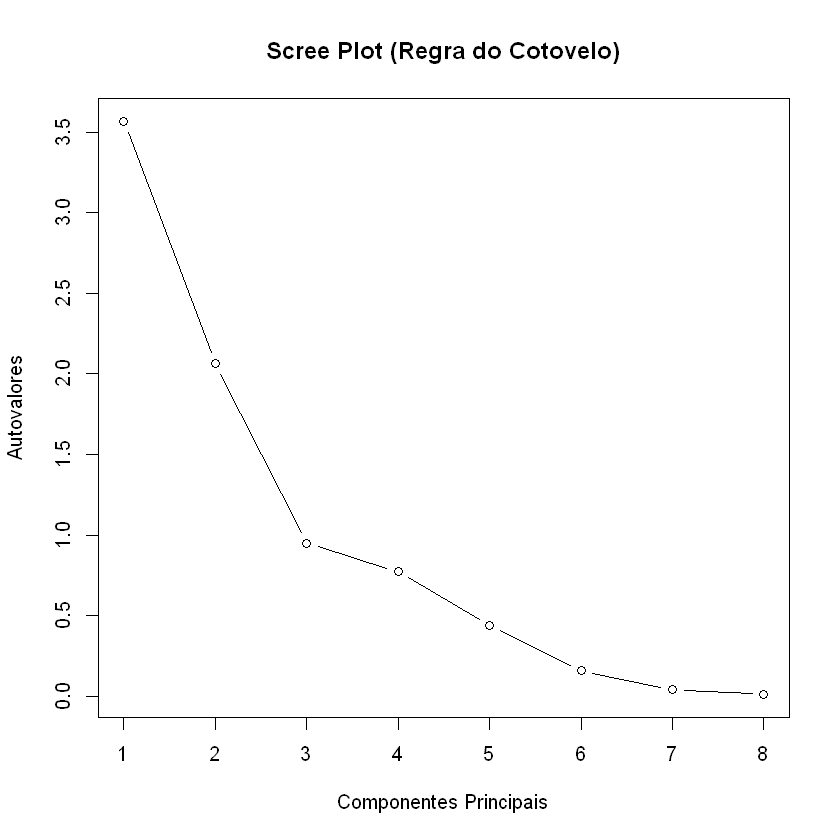

In [11]:
# Criar o Scree Plot
plot(variancias, type = "b", xlab = "Componentes Principais", 
     ylab = "Autovalores", main = "Scree Plot (Regra do Cotovelo)")

# A quebra ("cotovelo") é identificada visualmente no gráfico


In [13]:
# Calcular a variância explicada acumulada
variancia_explicada <- variancias / sum(variancias)
variancia_acumulada <- cumsum(variancia_explicada)

# Número de componentes que explicam pelo menos 90% da variância
componentes_90 <- which(variancia_acumulada >= 0.9)[1]
cat("Número de componentes para 90% da variância acumulada:", componentes_90, "\n")


Número de componentes para 90% da variância acumulada: 4 


Para identificar quais variáveis contribuem mais para a construção do eixo 1 (PC1) e do eixo 2 (PC2), analisamos os loadings (ou "pesos") das variáveis em cada componente principal. Esses valores indicam o grau de influência de cada variável na formação de cada componente.

In [15]:
# Exibir os loadings (pesos das variáveis nos componentes principais)
loadings <- acp$rotation
print(loadings)

                           PC1         PC2         PC3         PC4          PC5
Runtime             0.47259109 -0.24610602 -0.08070424 -0.05550279  0.337512524
Age                 0.01052551 -0.55950834  0.04894782  0.45421765 -0.644519085
Weight              0.13385567  0.22644224 -0.91103134 -0.07742531 -0.292349069
Oxygen_Consumption -0.46114666  0.24078154  0.08500512 -0.14970640 -0.006699843
Run_Pulse           0.34981409  0.43197234  0.21053737  0.36900341 -0.127554575
Rest_Pulse          0.32875463  0.06578237  0.29515196 -0.71808562 -0.532401340
Maximum_Pulse       0.30191311  0.50837555  0.14597270  0.32662029 -0.093473367
Performance        -0.47367950  0.26030230  0.03373830  0.06089161 -0.276963810
                            PC6         PC7          PC8
Runtime            -0.305460713  0.08976857  0.700868329
Age                -0.245794661  0.03015220  0.037430630
Weight             -0.061281234  0.07293747 -0.017045484
Oxygen_Consumption -0.765749776  0.33603178  0.01987

Para cada eixo (PC1 e PC2), identificamos as variáveis com **maiores valores absolutos** nos loadings. Quanto maior o valor absoluto, maior a contribuição da variável para o componente.